<a href="https://colab.research.google.com/github/samp3209/MachineLearning/blob/main/class4_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('DATA_RF.csv')


Y=df['PRICE']
X=df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,3969.0,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.97,2,242,17.8,3969.0,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.97,2,242,17.8,3928.3,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.06,3,222,18.7,3946.3,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.06,3,222,18.7,3969.0,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.48,1,273,21.0,3919.9,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.29,1,273,21.0,3969.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.17,1,273,21.0,3969.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.39,1,273,21.0,3934.5,6.48,22.0


In [7]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, Y_train)

y_pred_rf = rnd_clf.predict(X_test)


In [12]:
rnd_clf.score(X_train, Y_train)

0.9293179779226619

In [8]:
print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_rf))
print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_rf))
print('r2 score is :', r2_score(Y_test, y_pred_rf))

Mean Absolute percentage Error : 0.12466353380425078
Mean Absolute Error : 2.387189454784072
r2 score is : 0.864501232352169


In [17]:
importances = rnd_clf.feature_importances_

In [22]:
import time
import numpy as np

start_time = time.time()
importances = rnd_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rnd_clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.190 seconds


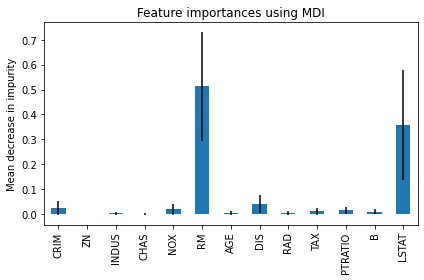

In [34]:
forest_importances = pd.Series(importances, X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

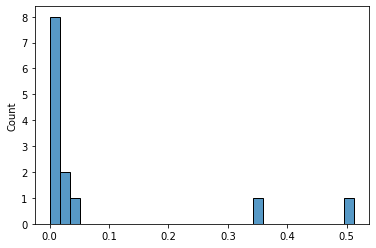

In [35]:

sns.histplot(data=forest_importances)